In [2]:
import pandas as pd
from os import listdir
import datetime as dt

# Task 1 -Merging all the CSV files 

In [3]:
filepath= [f for f in listdir('./') if f.endswith('.csv')]

df=pd.concat(map(pd.read_csv,filepath))
df.to_csv('dfs.csv',index=False) #To delete the index colomn - arg the index as false

df1=pd.read_csv('dfs.csv')
df1.head() #Working 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
Order ID            186305 non-null object
Product             186305 non-null object
Quantity Ordered    186305 non-null object
Price Each          186305 non-null object
Order Date          186305 non-null object
Purchase Address    186305 non-null object
dtypes: object(6)
memory usage: 8.6+ MB


### Subtask1- As am getting error called 'Nan' while changing datatype from obj to int ,hence am droping empty rows from dataframe

In [5]:
Nan_df=df1[df1.isna().any(axis=1)] #Finding the nan values
display(Nan_df.head())

df1=df1.dropna(how='all')
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Subtask 2 - Also am getting error called base 'or' . so looking and removing the or from data frame

In [6]:
df1= df1[df1['Order Date'].str[0:2] != 'Or']
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Sub task 3 - Error appeared as str cannot be multipled, hence converting to num value(int32)

In [7]:
df1['Quantity Ordered']=pd.to_numeric(df1['Quantity Ordered'],errors='ignore') #Making as int
df1['Price Each']=pd.to_numeric(df1['Price Each'],errors='ignore') #Making as float

## Task 2 - Adding the colomn as month to knew how much sale happend in month wise

### Augment data with additional columns( We can use as datetime method , but my kernal is bit slower)

In [8]:
df1['Month'] = df1['Order Date'].str[0:2]
df1['Month'] = df1['Month'].astype('int32')
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Task 3 - Adding city column 

In [9]:
#by apply(lambda f')
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]

df1['City']= df1['Purchase Address'].apply(lambda x: f'{get_city(x)} ({get_state(x)})') 
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


## Data Exploration! 

### Q1: What was the best month for sales? How much earned in that month?

In [10]:
df1['Sales']= df1['Quantity Ordered'].astype('int')*df1['Price Each'].astype('float')
df1.groupby(['Month']).sum()['Sales']


Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Sales, dtype: float64

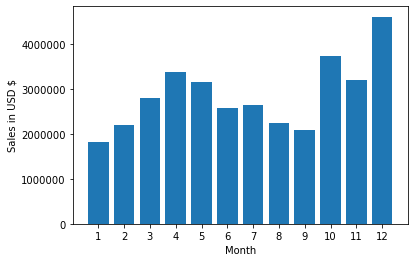

In [11]:
import matplotlib.pyplot as plt
months = range(1,13)

plt.bar(months, df1.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD $')
plt.xlabel('Month')
plt.show()

### Q2: What city sold the most product?

In [12]:
df1.groupby(['City']).sum()['Sales']

City
 Atlanta (GA)          2.795499e+06
 Austin (TX)           1.819582e+06
 Boston (MA)           3.661642e+06
 Dallas (TX)           2.767975e+06
 Los Angeles (CA)      5.452571e+06
 New York City (NY)    4.664317e+06
 Portland (ME)         4.497583e+05
 Portland (OR)         1.870732e+06
 San Francisco (CA)    8.262204e+06
 Seattle (WA)          2.747755e+06
Name: Sales, dtype: float64

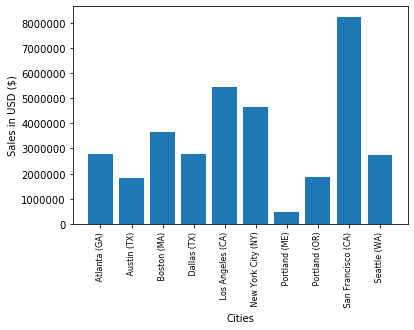

In [13]:
import matplotlib.pyplot as plt

cites = [city for city,df in df1.groupby(['City'])]

plt.bar(cites , df1.groupby(['City']).sum()['Sales'])
plt.xticks(cites , rotation = 'vertical' , size = 8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Cities')
plt.show()

### Q3: What time should we display advertisements to maximize likelihood of customer's buying product?

### Adding hour , min from order date to find the most purchased time 

In [14]:
df1['Order Date']=pd.to_datetime(df1['Order Date'])

In [15]:
df1.head()
pd.to_datetime(df1['Order Date'].head())

0   2019-04-19 08:46:00
2   2019-04-07 22:30:00
3   2019-04-12 14:38:00
4   2019-04-12 14:38:00
5   2019-04-30 09:27:00
Name: Order Date, dtype: datetime64[ns]

In [16]:
df1['Hour']= pd.to_datetime(df1['Order Date']).dt.hour
df1['Minute']=pd.to_datetime(df1['Order Date']).dt.minute
df1['Count']=1
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99,22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,9,27,1


In [17]:
df1.corr()

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute,Count
Quantity Ordered,1.000000,-0.148272,0.000791,-0.139417,-0.002218,0.001225,NaN
Price Each,-0.148272,1.000000,-0.003375,0.999203,0.001721,-0.002163,NaN
Month,0.000791,-0.003375,1.000000,-0.003466,0.001731,-0.002075,NaN
Sales,-0.139417,0.999203,-0.003466,1.000000,0.001668,-0.002162,NaN
Hour,-0.002218,0.001721,0.001731,0.001668,1.000000,-0.015345,NaN
Minute,0.001225,-0.002163,-0.002075,-0.002162,-0.015345,1.000000,NaN
Count,NaN,NaN,NaN,NaN,NaN,NaN,NaN


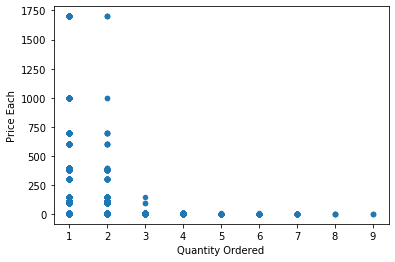

In [18]:
df1.plot('Quantity Ordered','Price Each',kind='scatter')

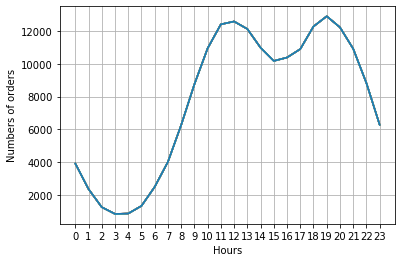

In [19]:
hours = [hour for hour,dt in df1.groupby('Hour')]
plt.plot(hours, df1.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Numbers of orders')
plt.grid()
plt.show()

### 11A.M and 7P.M is Best selling time. 
### Before time of 10AM to 11AM  & 6PM to 7PM best time to display the ads!  

## Q4: What products are most often sold together?¶

In [28]:
# Referenced: https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
dfd = df1[df1['Order ID'].duplicated(keep=False)] 

# Referenced:https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby

dfd['Grouped']=dfd.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df2= dfd[['Order ID','Grouped']].drop_duplicates()

df2.head(100)

c:\python\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
2662,179108,"Lightning Charging Cable,AAA Batteries (4-pack)"
2683,179128,"iPhone,Apple Airpods Headphones"
2718,179162,"Google Phone,USB-C Charging Cable"
2783,179226,"34in Ultrawide Monitor,Macbook Pro Laptop"


In [30]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
for key,values in count.most_common(10):
        print(key,values)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### (UP)Top 10 Most sold values are highlighted above

## Q5 : What product sold the most? Why do you think it sold the most?

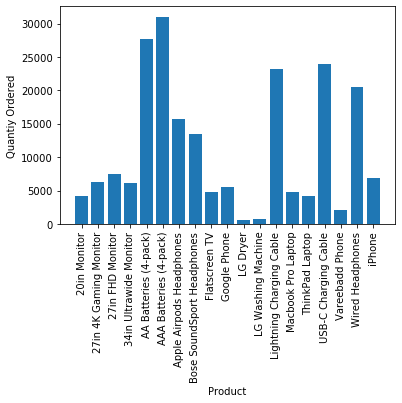

In [40]:
dfp= df1.groupby('Product')
dfq=dfp.sum()['Quantity Ordered']

products= [product for product,dfd in dfp ]

plt.bar(products,dfq)
plt.xlabel('Product')
plt.ylabel('Quantiy Ordered')
plt.xticks(products ,rotation='vertical', size=10)
plt.show()

c:\python\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


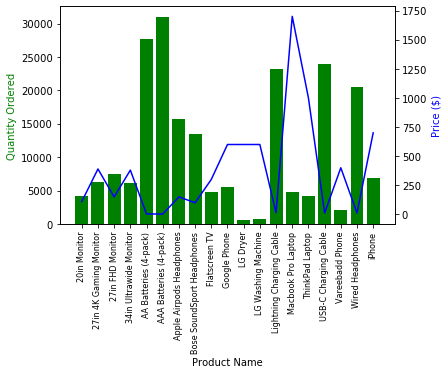

In [42]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib
prices = df1.groupby('Product').mean()['Price Each']

fig,ax1= plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, dfq, color='g')
ax2.plot(products, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

fig.show()

# Conclusion : If Product value is low, order quantity is high. So its inversly propositonal to both that could be identified from above graph. But some products demands to sold higher wven though price is higher. (i.e Mac book)